In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from oscopetools.LSN_analysis import LSN_analysis
from oscopetools import read_data as rd
import os, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = [8,5]   #[15,10]
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.titlesize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'xx-small'   #'medium'
mpl.rcParams['axes.labelsize'] = 'small'
mpl.rcParams['legend.fontsize'] = 'xx-small'
mpl.rcParams['xtick.labelsize'] = 'xx-small'
mpl.rcParams['ytick.labelsize'] = 'xx-small'

# Analyze single session

## 1. To initialize the analysis

**NOTE:** For more consistency in computing RFs using greedy pixelwise approach, please change the `number_of_shuffles` of the function `events_to_pvalues_no_fdr_correction` to 20000 or higher in `greedy_pixelwise_rf.py`.

In [2]:
CS_dir = '/home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/new_data/Soma Data/Center_Surround'
file = 'Center_Surround_1010436210_data.h5'

# The path to the data file.
datafile_path = os.path.join(CS_dir, file)
# The path to the LSN stimulus npy file.
LSN_stim_path = '/home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/openscope_surround-master/stimulus/sparse_noise_8x14.npy'
num_baseline_frames = 35   # int or None. The number of baseline frames before the start and after the end of a trial.
use_dff_z_score = False   # True or False. If True, the cell responses will be converted to z-score before analysis.
correct_LSN = False   # If True, the LSN stimulus corrected by eye positions will be used.
use_only_valid_eye_pos = False   # Use False for greedy pixelwise RF.
use_only_positive_responses = False   # If True, the fluorescence responses less than 0 will be set to 0 when computing the avg_responses.
RF_type = "Greedy pixelwise RF"   # "Greedy pixelwise RF" or "Trial averaged RF". The type of RFs to be computed.
RF_loc_thresh = 0.8   # The threshold for deciding whether the RF is located within the center or surround or not.

LSN_data = LSN_analysis(datafile_path, LSN_stim_path, num_baseline_frames, use_dff_z_score, correct_LSN, 
                        use_only_valid_eye_pos, use_only_positive_responses, RF_type, RF_loc_thresh)


Analyzing file: /home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/new_data/Soma Data/Center_Surround/Center_Surround_1010436210_data.h5
ON LSN stimulus value: 255
OFF LSN stimulus value: 0
Background LSN value: 127
LSN stimulus size: 9.3 degree
Number of cells: 14
Current RF type: Greedy pixelwise RF
Use DF/F z-score: False
Use corrected LSN: False
Use only valid eye positions: False
Use only positive fluorescence responses: False


## 2. Changing parameters

### 2.1 Different conditions for computing ON-OFF responses and RFs

- Other variables (RFs, ON/OFF responses, etc.) will be automatically updated.
- If using trial averaged RF, the RF array will be automatically updated with default RF parameters:
    - threshold = 0
    - window_start = None (the start frame of the stimulus will be used)
    - window_len = None (the stimulus trial length in frames will be used)
- If using greedy pixelwise RF, the RF array will be automatically updated with default RF parameters:
    - frame_shift = 3
    - alpha = 0.05
    - sweep_response_type = 'mean'
    - chisq_significant_lvl = 0.05
    - norm_RF = False
- The overlapping index and RF location masks will be updated with:
    - loc_thresh = LSN_data.RF_loc_thresh
    - RF_thresh = 0
    - bin_num = 1000

In [3]:
# If True, the LSN stimulus corrected by eye positions will be used. 
# Otherwise, the original LSN stimulus will be used.
correct_LSN = True
LSN_data.correct_LSN_by_eye_pos(correct_LSN)


Analyzing file: /home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/Multiplex/Center_Surround/Center_Surround_986765043_data.h5
ON LSN stimulus value: 255
OFF LSN stimulus value: 0
Background LSN value: 127
LSN stimulus size: 9.3 degree
Number of cells: 41
Current RF type: Greedy pixelwise RF
Use DF/F z-score: False
Use corrected LSN: True
Use only valid eye positions: False
Use only positive fluorescence responses: False


In [4]:
# If True, only stimuli with valid eye positions are used. Otherwise, all stimuli will be used.
use_only_valid_eye_pos = True
LSN_data.use_valid_eye_pos(use_only_valid_eye_pos)

Failed to change use_valid_eye_pos to True! 
Recomputing the responses with use_valid_eye_pos(False)...

Analyzing file: /home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/Multiplex/Center_Surround/Center_Surround_986765043_data.h5
ON LSN stimulus value: 255
OFF LSN stimulus value: 0
Background LSN value: 127
LSN stimulus size: 9.3 degree
Number of cells: 41
Current RF type: Greedy pixelwise RF
Use DF/F z-score: False
Use corrected LSN: True
Use only valid eye positions: False
Use only positive fluorescence responses: False


In [5]:
# If True, the fluorescence responses less than 0 will be set to 0 when computing the avg_responses.
use_only_positive_responses = True
LSN_data.use_positive_fluo(use_only_positive_responses)


Analyzing file: /home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/Multiplex/Center_Surround/Center_Surround_986765043_data.h5
ON LSN stimulus value: 255
OFF LSN stimulus value: 0
Background LSN value: 127
LSN stimulus size: 9.3 degree
Number of cells: 41
Current RF type: Greedy pixelwise RF
Use DF/F z-score: False
Use corrected LSN: True
Use only valid eye positions: False
Use only positive fluorescence responses: True


### 2.2 Different RF types

- The RFs were computed during initialization with default parameters. 

#### 2.2.1 Trial averaged RF
- The threshold and integration window for RFs can be changed.
- To compute the RFs by using different thresholds (default = 0) and different integration windows by adjusting:
    - window_start:
        The start of the window in frame. If there are baseline frames, then index $0$ to $n-1$ are the first $n$ baseline frames. The stimulus starts at the $n$th frame.
    - window_len: 
        The length of the integration window in frames. If None, the stimulus trial length in frames will be used.

In [20]:
threshold = 0.   # int or float, range = [0, 1]. The threshold for the RF, anything below the threshold will be set to 0.
window_start = num_baseline_frames + 3   # int or None. The start index (within a trial) of the integration window for computing the RFs.
window_len = 7 * 3   # int or None. The length of the integration window in frames for computing the RFs.
LSN_data.get_trial_avg_RFs(threshold, window_start, window_len)

#### 2.2.2 Greedy pixelwise RF

- frame_shift: The frame shift of the window to account for the delay in calcium responses for the Chi-square test. Default is 3.
- alpha: The significance threshold for a pixel to be included in the RF map. This number will be corrected for multiple comparisons (number of pixels).
- sweep_response_type: Choice of 'mean' for mean_sweep_events or 'binary' to make boolean calls of whether any events occurred within the sweep window.
- chisq_significant_lvl: The significance threshold of the Chi-square test p-values for the RF pixels to be included.
- norm_RF: If True, the computed RFs will be normalized to their corresponding max value.

In [25]:
frame_shift = 3   # int
alpha = 0.05   # float
sweep_response_type = 'mean'   # str
chisq_significant_lvl = 0.05   # float
norm_RF = False   # bool
LSN_data.get_greedy_RFs(frame_shift, alpha, sweep_response_type, chisq_significant_lvl, norm_RF)

### 2.3 Using different location thresholds

To get the boolean masks of RF locations based on their overlapping index with the centers. This has to be recomputed if changed the RF type in section 2.2 but is auto-recomputed if changed conditions in section 2.1 with deefault parameters.
- loc_thresh ($\vartheta$): The threshold for deciding whether the RF is located within the center or surround or not.
- RF_thresh: The threshold of RFs to be considered. Default is 0.
- bin_num ($n$): The number of binning for an LSN pixel when computing the overlapping indices. Higher bin_num gives higher precision but will take longer computational time.

$$ S_i^{P} (\vec x_c, r_c) = \frac {\sum_{\vec x} R(\vec x, \vec x_c, r_c) \left| \Psi_i^P(\vec x) \right|} {\sum_{\vec x} \left| \Psi_i^P(\vec x) \right|}, P \in \{ \text{ON}, \text{OFF} \} $$

\begin{split}
R(\vec x, \vec x_c, r_c) &= 
\begin{cases}
1, & \text{if } \left\Vert \vec x - \vec x_c \right\Vert_2 \leq r_c \\
0, & \text{otherwise}
\end{cases}
\end{split}

$$ \vec x \in \left\{ 
         \begin{bmatrix}
           -0.5 + \frac{i}{n} \\
           -0.5 + \frac{j}{n}
         \end{bmatrix}
         \Bigg| \forall i \in \left[ 0 .. 14n \right], \forall j \in \left[ 0 .. 8n \right] , n \in \mathbb{Z}^+
\right\} $$

$$ \vec x_c = 
         \begin{bmatrix}
           6.5 \\
           3.5
         \end{bmatrix} +
         \begin{bmatrix}
           x_{\text{shift}} \\
           y_{\text{shift}}
         \end{bmatrix} $$

$$ r_c: \text{The radius of the CS center in LSN pixels} $$

$$ n: \text{The number of bins per LSN pixel} $$

$$ x_{\text{shift}}, y_{\text{shift}}: \text{The x- and y-shifts of the CS center in LSN pixels} $$

$$ \Psi_i^P(\vec x): \text{ON or OFF receptive subfield of } i \text{th cell} $$

\begin{split}
G_i^P &= 
\begin{cases}
\text{Center}, & \text{if } S_i^P \geq \vartheta \\
\text{Surround}, & \text{if } S_i^P \leq 1 - \vartheta \\
\text{Border}, & \text{if } 1 - \vartheta < S_i^P < \vartheta \\
\text{No } P \text{ subfield}, & \text{otherwise}
\end{cases}
\end{split}

\begin{split}
G_i &= 
\begin{cases}
\text{Both center}, & \text{if } S_i^{\text{ON}} \geq \vartheta \text{ and } S_i^{\text{OFF}} \geq \vartheta \\
\text{Both surround}, & \text{if } S_i^{\text{ON}} \leq 1 - \vartheta \text{ and } S_i^{\text{OFF}} \leq 1 - \vartheta \\
\text{Both border}, & \text{if } 1 - \vartheta < S_i^{\text{ON}} < \vartheta \text{ and } 1 - \vartheta < S_i^{\text{OFF}} < \vartheta \\
\text{ON center alone}, & \text{if } S_i^{\text{ON}} \geq \vartheta \text{ and no OFF subfield} \\
\text{OFF center alone}, & \text{if } S_i^{\text{OFF}} \geq \vartheta \text{ and no ON subfield} \\
\text{ON center OFF surround}, & \text{if } S_i^{\text{ON}} \geq \vartheta \text{ and } S_i^{\text{OFF}} \leq 1 - \vartheta \\
\text{OFF center ON surround}, & \text{if } S_i^{\text{OFF}} \geq \vartheta \text{ and } S_i^{\text{ON}} \leq 1 - \vartheta \\
\text{No RF}, & \text{if no ON subfield and no OFF subfield}
\end{cases}
\end{split}

$$ \vartheta: \text{The overlapping threshold for determining whether a receptive subfield is within the CS center or not} $$

In [3]:
loc_thresh = 0.8   # float
RF_thresh = 0   # float or int
bin_num = 1000   # int
LSN_data.get_RF_loc_masks(loc_thresh, RF_thresh, bin_num)

### 2.4 Save data

In [3]:
save_dir = "/home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/analysed_data/greedy_RFs"
metadata = rd.get_metadata(datafile_path)
save_filepath = os.path.join(save_dir, "outputs_{}.npy".format(metadata['session_ID']))
LSN_data.save_data(save_filepath)

Data saved!


## 3. Plotting

### 3.1 To plot the trial-averaged responses within pixels (all pixels of the LSN stimulus) for a cell.

- To visualize the integration window of the RF (blue) relative to the stimulus (gray).
- Each line plot is the average ON or OFF response of the selected cell on a square pixel of the LSN stimulus.
- Other keyword arguments can be added for plt.plot().

In [3]:
idx = iter(range(LSN_data.num_cells))

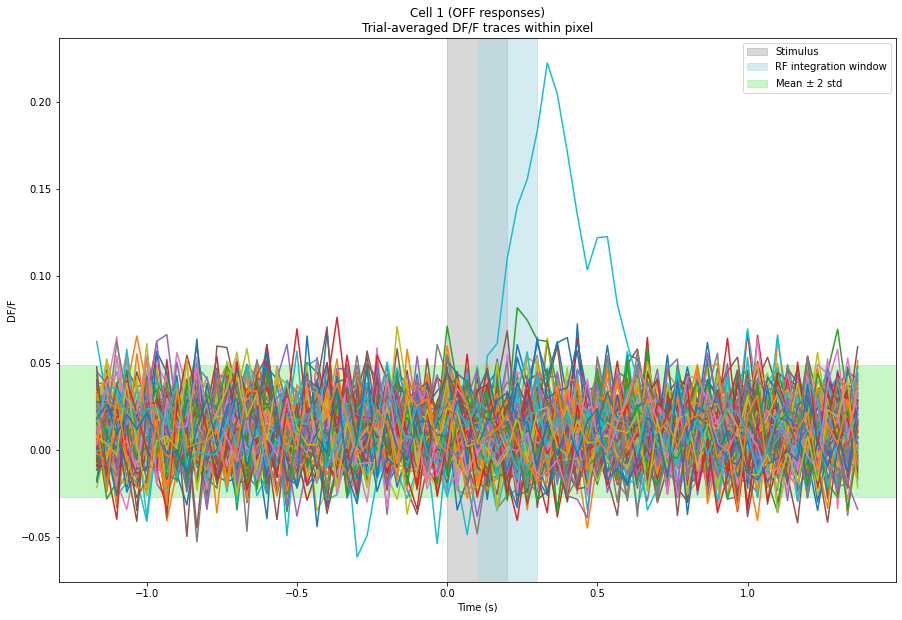

In [4]:
plt.figure(figsize=(15,10))
polarity = 'OFF'   # 'ON' or 'OFF'. The polarity of the responses to be plotted.
cell_idx = 1   #next(idx)   # The cell index to be plotted.
num_std = 2   # int or float. Number of standard deviation from mean for plotting the horizontal span.
save_fig = False
ax = LSN_data.plot_pixel_avg_dff_traces(polarity, cell_idx, num_std)
if save_fig:
    fig = ax.get_figure()
    fig.savefig(os.path.join(save_dir, 'cell_{}_{}_responses'.format(cell_idx, polarity)))

### 3.2 To plot the RFs

- To plot the RF of selected cells using the integration window (if used trial averaged RF) set above.
- Choose the polarity (ON, OFF, or both) to be plotted.
- The RFs are being normalized to range [-1, 1] for plotting.

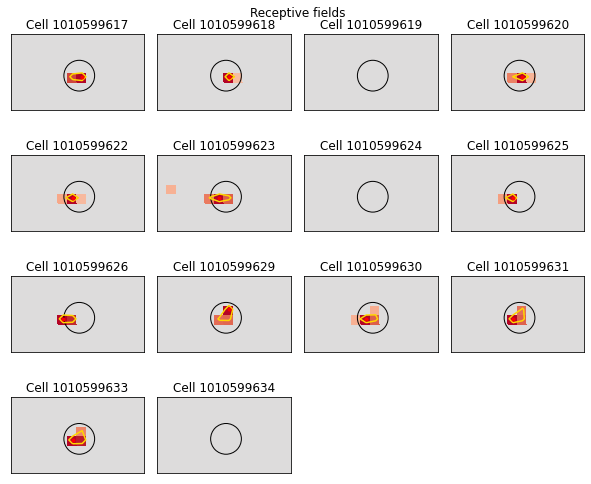

In [5]:
fig_title = "Receptive fields"   # The title of the figure.
cell_idx_lst = np.arange(LSN_data.num_cells)   # list or np.array. The cell numbers to be plotted.
polarity = 'ON'   # 'ON', 'OFF', or 'both'. The polarity of the RFs to be plotted.
num_cols = 4   # int. The number of columns of the subplots.
label_peak = True   # bool. If True, the pixel with max response will be labeled. The ON peaks are labeled with red dots and OFF peaks with blue dots.
show_CS_center = True   # bool. If True, the CS center will be plotted.
contour_levels = [0.6]   # list or array-like. The contour levels to be plotted. Examples: [], [0.5], [0.6, 0.8].
fig = LSN_data.plot_RFs(fig_title, cell_idx_lst, polarity, num_cols, label_peak, show_CS_center, contour_levels)

# Analyze multiple sessions

In [2]:
def analyze_RFs_all_sessions(datadir_path, savedir_path, LSN_stim_path, num_baseline_frames,
                             use_dff_z_score=False, correct_LSN=False, use_only_valid_eye_pos=False,
                             use_only_positive_responses=False, RF_type="Greedy pixelwise RF", 
                             RF_loc_thresh=0.8):
    """To analyze the RFs for all sessions within a folder.
    
    Parameters:
    -----------
    datadir_path : str
        The path to the folder containing the data.
    savedir_path : str
        The path to the folder for saving the outputs.
    LSN_stim_path : str
        The path to the LSN stimulus npy file.
    num_baseline_frames : int
        The number of baseline frames before the start and after the end of a trial.
    use_dff_z_score : bool
        If True, the cell responses will be converted to z-score before analysis.
    correct_LSN : bool
        If True, the LSN stimulus corrected by eye positions will be used. Otherwise, the original LSN 
        stimulus will be used. The stimulus wlll remain unchanged for those frames without valid eye positions.
    use_only_valid_eye_pos : bool
        If True, only stimuli with valid eye positions are used. Otherwise, all stimuli will be used.
    use_only_positive_responses : bool
        If True, the fluorescence responses less than 0 will be set to 0 when computing the avg_responses.
    RF_type : str
        "Greedy pixelwise RF" or "Trial averaged RF". The type of RFs to be computed.
    RF_loc_thresh : float
        The threshold for deciding whether the RF is located within the center or surround or not.
    
    Returns
    -------
    chi_square_pvals_dict : dict
        Dictionary containing the Chi-square p-values for all sessions.
    RFs_dict : dict
        Dictionary containing the ON and OFF RFs for all sessions.
    ovl_idx_dict : dict
        Dictionary containing the ON and OFF overlapping index for all sessions.
    RF_loc_mask_dict : dict
        Dictionary containing the RF location masks for different conditions for all sessions.
    """
    chi_square_pvals_dict = {}
    RFs_dict = {}
    ovl_idx_dict = {}
    RF_loc_mask_dict = {}
    files = os.listdir(datadir_path)
    for i, file in enumerate(files):
        datafile_path = os.path.join(datadir_path, file)
        metadata = rd.get_metadata(datafile_path)
        LSN_data = LSN_analysis(datafile_path, LSN_stim_path, num_baseline_frames, use_dff_z_score, 
                                correct_LSN, use_only_valid_eye_pos, use_only_positive_responses, 
                                RF_type, RF_loc_thresh, verbose=False)
        stim_sess = 'CS' if LSN_data._is_CS_session else 'Session'
        session = '{} {}, ({}, {})'.format(stim_sess, metadata['session_ID'], metadata['area'], metadata['cre'])
        chi_square_pvals_dict[session] = LSN_data.chi_square_pvals
        RFs_dict[session] = {}
        RFs_dict[session]['ON'] = LSN_data.ON_RFs
        RFs_dict[session]['OFF'] = LSN_data.OFF_RFs
        ovl_idx_dict[session] = {}
        ovl_idx_dict[session]['ON'] = LSN_data.ON_overlap_idx
        ovl_idx_dict[session]['OFF'] = LSN_data.OFF_overlap_idx
        RF_loc_mask_dict[session] = LSN_data.location_mask_dict
        print("{} ({}/{}) done.".format(file, i+1, len(files)))
    np.save(os.path.join(savedir_path, 'Chi_squares_p_val_all_sessions'), chi_square_pvals_dict)
    np.save(os.path.join(savedir_path, 'final_RFs_all_sessions'), RFs_dict)
    np.save(os.path.join(savedir_path, 'overlapping_index_all_sessions'), ovl_idx_dict)
    np.save(os.path.join(savedir_path, 'RF_location_masks_thresh_{}'.format(RF_loc_thresh)), RF_loc_mask_dict)
    return chi_square_pvals_dict, RFs_dict, ovl_idx_dict, RF_loc_mask_dict

In [3]:
data_dir = '/home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/new_data/Soma Data/Center_Surround'
LSN_stim_path = '/home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/openscope_surround-master/stimulus/sparse_noise_8x14.npy'
save_dir = '/home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/analysed_data/greedy_RFs'
num_baseline_frames = 10   # int or None. The number of baseline frames before the start and after the end of a trial.
use_dff_z_score = False
correct_LSN = False   # If True, the LSN stimulus corrected by eye positions will be used.
use_only_valid_eye_pos = False   # Use False for greedy pixelwise RF.
use_only_positive_responses = False   # If True, the fluorescence responses less than 0 will be set to 0 when computing the avg_responses.
RF_type = "Greedy pixelwise RF"   # "Greedy pixelwise RF" or "Trial averaged RF". The type of RFs to be computed.
RF_loc_thresh = 0.8   # The threshold for deciding whether the RF is located within the center or surround or not.

(chi_square_pvals_dict, RFs_dict, ovl_idx_dict, 
 RF_loc_mask_dict) = analyze_RFs_all_sessions(data_dir, save_dir, LSN_stim_path, num_baseline_frames, 
                                              use_dff_z_score, correct_LSN, use_only_valid_eye_pos, 
                                              use_only_positive_responses, RF_type, RF_loc_thresh)

Center_Surround_1010436210_data.h5 (1/37) done.
Center_Surround_989418742_data.h5 (2/37) done.
Center_Surround_986765043_data.h5 (3/37) done.
Center_Surround_1005201417_data.h5 (4/37) done.
Center_Surround_992742223_data.h5 (5/37) done.
Center_Surround_981714380_data.h5 (6/37) done.
Center_Surround_993230912_data.h5 (7/37) done.
Center_Surround_992260410_data.h5 (8/37) done.
Center_Surround_978206308_data.h5 (9/37) done.
Center_Surround_993675703_data.h5 (10/37) done.
Center_Surround_993777805_data.h5 (11/37) done.
Center_Surround_1012864690_data.h5 (12/37) done.
Center_Surround_990815631_data.h5 (13/37) done.
Center_Surround_1013163234_data.h5 (14/37) done.
Center_Surround_976085882_data.h5 (15/37) done.
Center_Surround_994732235_data.h5 (16/37) done.
Center_Surround_979264183_data.h5 (17/37) done.
Center_Surround_991976591_data.h5 (18/37) done.
Center_Surround_993944623_data.h5 (19/37) done.
Center_Surround_993256153_data.h5 (20/37) done.
Center_Surround_993994146_data.h5 (21/37) don